# Airbnb data compared with Seattle and Boston

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Data Understanding

In [28]:
#Fisrt sheet called calendar
calendar_seattle = pd.read_csv('./calendar.csv')
calendar_seattle = pd.read_csv('./calendar_boston.csv')
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
# Second sheet called listing 
df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [285]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [42]:
df.shape

(3818, 92)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

## Data Preparation

Clean the missing values if necessary and convert the data into suitable types. Some data visualizations will also be provided to answer a few questions.    

### 1. Which is the most popular season to visit Seattle?

In [9]:
# Drop the missing data in price column
calendar = calendar.dropna(subset = ['price'], axis = 0)
#Change the data column to timeseries
calendar.date = pd.to_datetime(calendar.date)
#Change the price column to float
calendar['price'] = calendar.price.str.slice(start = 1).str.replace(',','').astype('float')

In [20]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [24]:
calendar_meanbydate = calendar.groupby(['date']).mean()

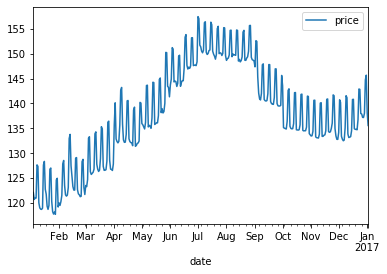

In [27]:
calendar_meanbydate[['price']].plot(kind = 'line')

#### As we can see from the above graph, the price in Seattle moves up from spring, especially from April to August. The peak of the price is in July and August. The price moves down after September. 

## 2. What is the most type of property provided in Seattle? And Which property has topped review score?

In [286]:
#Count numbers of each property in Seattle and visualization. 
property_type = df['property_type'].astype("category")

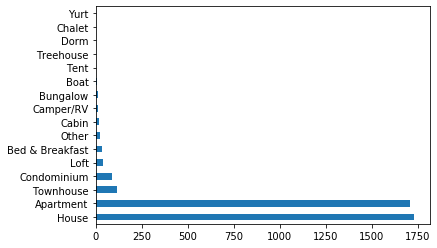

In [287]:
property_type.value_counts().plot(kind = 'barh')

In [288]:
property_review = df[['property_type','number_of_reviews','review_scores_rating']].dropna()
property_review.head()

,property_type,number_of_reviews,review_scores_rating
0,Apartment,207,95.0
1,Apartment,43,96.0
2,House,20,97.0
4,House,38,92.0
5,House,17,95.0


In [289]:
# Groupby different property to undertand the mean of each property's number of reviews and review score rating
property_review = property_review.groupby(['property_type']).mean()
property_review.sort_values('review_scores_rating', ascending=False)

,number_of_reviews,review_scores_rating
property_type,,
Yurt,25.000000,100.000000
Bungalow,8.222222,97.666667
Townhouse,13.962500,96.625000
Other,37.842105,96.263158
Cabin,92.571429,96.238095
Treehouse,15.000000,96.000000
Bed & Breakfast,34.384615,95.730769
Camper/RV,63.800000,95.700000
Boat,13.400000,95.600000


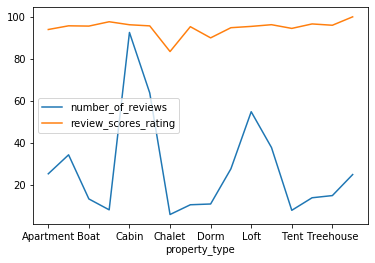

In [290]:
# Draw the the above frame
property_review.plot(kind = 'line')

#### Apartment and house are the most kinds of property provided in the Seattle. 
#### The Cabin has most reviews and the secondary is Loft. The review of score are mostly the same, but the Chalet has comparely the lowest.  

## 3.How's the correlaction with the accommodates, review scores and the price?  

In [5]:
predict_price = df[['accommodates','bathrooms','bedrooms','beds','price','review_scores_rating']]
predict_price.head()

,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,4,1.0,1.0,1.0,$85.00,95.0
1,4,1.0,1.0,1.0,$150.00,96.0
2,11,4.5,5.0,7.0,$975.00,97.0
3,3,1.0,0.0,2.0,$100.00,NaN
4,6,2.0,3.0,3.0,$450.00,92.0


In [6]:
# Convert price into float
predict_price['price']= predict_price.price.str.slice(start = 1).str.replace(',','').astype(float)

C:\Users\Christine Liou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
corr = predict_price.corr()
corr.style.background_gradient(cmap='coolwarm')

,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
accommodates,1.000000,0.538439,0.770974,0.861119,0.652218,-0.013101
bathrooms,0.538439,1.000000,0.610937,0.532838,0.516424,0.045101
bedrooms,0.770974,0.610937,1.000000,0.753167,0.627720,0.023257
beds,0.861119,0.532838,0.753167,1.000000,0.589525,-0.000720
price,0.652218,0.516424,0.627720,0.589525,1.000000,0.055551
review_scores_rating,-0.013101,0.045101,0.023257,-0.000720,0.055551,1.000000


 #### The correlations of the room details are as above graph. As we can see that, the size of beds and accommodates have higher correlaction, which really make sense. In addiction, we can also find that the sizes of accommodates and bedrooms are more correlated to prices. And the review scores rating is indepandent to the other variables. The room details would not affect the rating of review scores.  

## 4. What reason might affect the review score from the customers?

In [32]:
df_review_score = df[['host_since','host_response_rate','host_is_superhost','host_total_listings_count','property_type','room_type','accommodates','bathrooms','bedrooms','price','number_of_reviews','review_scores_rating','cancellation_policy']] 
# drop rows with missing review_scores_rating vlaues
df_drop_review_score = df_review_score.dropna(subset = ['review_scores_rating'], axis = 0)
df_drop_review_score.head()

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,cancellation_policy
0,2011-08-11,96%,f,3.0,Apartment,Entire home/apt,4,1.0,1.0,$85.00,207,95.0,moderate
1,2013-02-21,98%,t,6.0,Apartment,Entire home/apt,4,1.0,1.0,$150.00,43,96.0,strict
2,2014-06-12,67%,f,2.0,House,Entire home/apt,11,4.5,5.0,$975.00,20,97.0,strict
4,2011-11-29,100%,f,2.0,House,Entire home/apt,6,2.0,3.0,$450.00,38,92.0,strict
5,2010-12-25,NaN,f,1.0,House,Private room,2,1.0,1.0,$120.00,17,95.0,strict


In [33]:
# Only use the year of host_since 
df_drop_review_score['host_since'] = df_drop_review_score.host_since.str.split('-').str.get(0).astype('int')
df_drop_review_score.host_since.value_counts()

C:\Users\Christine Liou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2014    764
2015    711
2013    685
2012    475
2011    337
2010    137
2009     59
2008      3
Name: host_since, dtype: int64

In [34]:
# convert price to float 
df_drop_review_score['price'] = df_drop_review_score.price.str.slice(start = 1).str.replace(',','').astype('float')

C:\Users\Christine Liou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# Convert price to different range
def rank_price(price):
    '''
    Input: 
    price - The price column
    
    Output: 
    price - A new column implicates the category range of price
    
    Group the price column to different range
    Use 50 as an interval. But the interval become 100 after 300 dollar due to the less amount.   
    '''
    if price <= 50:
        return 'price <50'
    elif price <= 100:
        return "price<100"
    elif price <= 150:
        return 'price <150'
    elif price <= 200:
        return "price<200"
    elif price <= 250:
        return 'price<250'
    elif price <= 300:
        return 'price<300'
    elif price <= 400:
        return 'price<400'
    elif price <= 500:
        return 'price<500'
    else:
        return "price>500"
df_drop_review_score['price'].apply(rank_price).value_counts()
df_drop_review_score['price'] = df_drop_review_score['price'].apply(rank_price).astype('category')

C:\Users\Christine Liou\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
# Convert host_response_rate to float
df_drop_review_score['host_response_rate']= df_drop_review_score.host_response_rate.str.replace('%','').astype(float)

C:\Users\Christine Liou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Convert host_is_superhost to bool
def superhost(superhost):
    '''
    Input: 
    superhost- The superhost column
    
    Output: 
    host_is_superhost - Boolean of the superhost column
    
    Change the type of the superhost column into the boolean type.
    '''
    if superhost == 't':
        return True
    else:
        return False
df_drop_review_score['host_is_superhost'] = df_drop_review_score['host_is_superhost'].apply(superhost)

C:\Users\Christine Liou\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [38]:
df_drop_review_score[['property_type','room_type','cancellation_policy']] = df_drop_review_score[['property_type','room_type','cancellation_policy']].astype('category')

C:\Users\Christine Liou\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [39]:
df_drop_review_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   host_since                 3171 non-null   int32   
 1   host_response_rate         2859 non-null   float64 
 2   host_is_superhost          3171 non-null   bool    
 3   host_total_listings_count  3171 non-null   float64 
 4   property_type              3171 non-null   category
 5   room_type                  3171 non-null   category
 6   accommodates               3171 non-null   int64   
 7   bathrooms                  3159 non-null   float64 
 8   bedrooms                   3165 non-null   float64 
 9   price                      3171 non-null   category
 10  number_of_reviews          3171 non-null   int64   
 11  review_scores_rating       3171 non-null   float64 
 12  cancellation_policy        3171 non-null   category
dtypes: bool(1), category(4), float64(

In [40]:
# Fill numeric columns with mean
num_vars = df_drop_review_score.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_drop_review_score[col].fillna((df_drop_review_score[col].mean()), inplace=True)

# Dummy the categorical variables
cat_vars = df_drop_review_score.select_dtypes(include=['object','category']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_drop_review_score = pd.concat([df_drop_review_score.drop(var, axis=1), pd.get_dummies(df_drop_review_score[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

C:\Users\Christine Liou\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
df_drop_review_score.head()

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,number_of_reviews,review_scores_rating,property_type_Bed & Breakfast,...,price_price <50,price_price<100,price_price<200,price_price<250,price_price<300,price_price<400,price_price<500,price_price>500,cancellation_policy_moderate,cancellation_policy_strict
0,2011,96.000000,False,3.0,4,1.0,1.0,207,95.0,0,...,0,1,0,0,0,0,0,0,1,0
1,2013,98.000000,True,6.0,4,1.0,1.0,43,96.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2014,67.000000,False,2.0,11,4.5,5.0,20,97.0,0,...,0,0,0,0,0,0,0,1,0,1
4,2011,100.000000,False,2.0,6,2.0,3.0,38,92.0,0,...,0,0,0,0,0,0,1,0,0,1
5,2010,95.223155,False,1.0,2,1.0,1.0,17,95.0,0,...,0,0,0,0,0,0,0,0,0,1


## Data Modeling

After data preparation, a linear regression model is built to predict the review scores. 

In [42]:
# Separate the dependent variable and independent variables
X= df_drop_review_score.drop(['review_scores_rating'],axis = 1)
y = df_drop_review_score['review_scores_rating']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=50)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [43]:
test_score

0.08316955471116738

In [44]:
train_score

0.09937999740233328

In [45]:
def coef_weights(coefficients, X_train):
    '''
    Input:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    
    Output:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Builds a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    The datafram is sort with abs_coefs.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.sort_values('abs_coefs', ascending = False).head(20)

,est_int,coefs,abs_coefs
10,property_type_Bungalow,3.861795,3.861795
2,host_is_superhost,3.425093,3.425093
22,property_type_Yurt,3.339475,3.339475
18,property_type_Other,2.768783,2.768783
13,property_type_Chalet,2.662618,2.662618
21,property_type_Treehouse,2.608754,2.608754
19,property_type_Tent,2.335520,2.335520
20,property_type_Townhouse,2.178693,2.178693
31,price_price<500,2.113229,2.113229
15,property_type_Dorm,-2.036004,2.036004


#### I try to use 11 variables to predict the review_scores_rating and find the top correlation with review_scores_rating. The result shows that if the host is super host, the review scores might be higher. Besides, the property and the price are also have stronger relationship with review scores. 

## Results Evaluating
Based on the analysis above, we can figure out a few insights:
- The busiest visiting season is summer.
- The most type of property provided in Seattle is House.
- The highest review score of the property is Yurt.
- The accommodates and bedrooms have a positive correlation with price.
- The type of property and whether the super host or not have stronger relationships with review scores.